In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
engine = create_engine("sqlite:///hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes

In [8]:
# View keys
Base.classes.keys()

['measurement', 'station']

In [9]:
# Save references to each table
# This creates a variable we can use to to ref a class easier than typing Base.classes.<class name> every time
Measurement = Base.classes.measurement
Station = Base.classes.station

In [10]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [11]:
# Important addition: to check columns you can use the following, to get metadata and column list:

Measurement.__table__

Table('measurement', MetaData(bind=None), Column('id', INTEGER(), table=<measurement>, primary_key=True, nullable=False), Column('station', TEXT(), table=<measurement>), Column('date', TEXT(), table=<measurement>), Column('prcp', FLOAT(), table=<measurement>), Column('tobs', FLOAT(), table=<measurement>), schema=None)

In [12]:
Station.__table__.columns.keys()

['id', 'station', 'name', 'latitude', 'longitude', 'elevation']

# Exploratory Climate Analysis

#### Design a query to retrieve the last 12 months of precipitation data and plot the results. 


In [13]:
# Starting from the last data point in the database. 
# Calculate the date one year from the last date in data set. 
# (gets the date from one year prior to selected date, from Aug 23 2017 to Aug 23 2016)
prev_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)

In [14]:
# Perform a query to retrieve the data and precipitation scores 
# (create a variable, then add session created earlier so that we can query our db)
# session.query() is how we'll begin all SQLite queries.
results = []
    # results = session.query(Measurement.date, Measurement.prcp) 
    # print(results.all())
    # above will be filtered further below. NOTE: .all() extracts results and 
    # puts them in a list. Added to query below.

results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= prev_year).all()
print (results)

[('2016-08-23', 0.0), ('2016-08-24', 0.08), ('2016-08-25', 0.08), ('2016-08-26', 0.0), ('2016-08-27', 0.0), ('2016-08-28', 0.01), ('2016-08-29', 0.0), ('2016-08-30', 0.0), ('2016-08-31', 0.13), ('2016-09-01', 0.0), ('2016-09-02', 0.0), ('2016-09-03', 0.0), ('2016-09-04', 0.03), ('2016-09-05', None), ('2016-09-06', None), ('2016-09-07', 0.05), ('2016-09-08', 0.0), ('2016-09-09', 0.03), ('2016-09-10', 0.0), ('2016-09-11', 0.05), ('2016-09-12', 0.0), ('2016-09-13', 0.02), ('2016-09-14', 1.32), ('2016-09-15', 0.42), ('2016-09-16', 0.06), ('2016-09-17', 0.05), ('2016-09-18', 0.0), ('2016-09-19', 0.0), ('2016-09-20', 0.0), ('2016-09-21', 0.0), ('2016-09-22', 0.02), ('2016-09-23', 0.0), ('2016-09-24', 0.0), ('2016-09-25', 0.0), ('2016-09-26', 0.06), ('2016-09-27', 0.02), ('2016-09-28', 0.0), ('2016-09-29', 0.0), ('2016-09-30', 0.0), ('2016-10-01', 0.0), ('2016-10-02', 0.0), ('2016-10-03', 0.0), ('2016-10-04', 0.0), ('2016-10-05', 0.0), ('2016-10-06', 0.0), ('2016-10-07', 0.0), ('2016-10-08', 

In [15]:
# Save the query results as a Pandas DataFrame and set the index to the date column
    # In order to save our results as a DataFrame, we need to provide our results 
    # variable as one parameter and specify the column names as our second parameter.
df = pd.DataFrame(results, columns=['date','precipitation'])
    # By setting inplace = True, we overwrite the df above instead of cre
df.set_index(df['date'], inplace=True)

    # print (df)
    # print without index because it now looks like two date columns
# print(df.to_string(index=False))


# Sort the dataframe by date
    # We already made date the index, so sort by index
df = df.sort_index()

print(df.to_string(index=False))

       date  precipitation
 2016-08-23           0.00
 2016-08-23            NaN
 2016-08-23           1.79
 2016-08-23           0.05
 2016-08-23           0.15
 2016-08-23           0.70
 2016-08-23           0.02
 2016-08-24           0.08
 2016-08-24           2.15
 2016-08-24           2.28
 2016-08-24            NaN
 2016-08-24           1.45
 2016-08-24           1.22
 2016-08-24           2.15
 2016-08-25           0.08
 2016-08-25           0.00
 2016-08-25           0.21
 2016-08-25           0.06
 2016-08-25           0.00
 2016-08-25           0.11
 2016-08-25           0.08
 2016-08-26           0.03
 2016-08-26           0.01
 2016-08-26           0.00
 2016-08-26           0.04
 2016-08-26           0.02
 2016-08-26           0.00
 2016-08-27           0.18
 2016-08-27           0.12
 2016-08-27           0.00
 2016-08-27           0.00
 2016-08-27           0.02
 2016-08-27            NaN
 2016-08-28           0.60
 2016-08-28           0.14
 2016-08-28           0.01
 

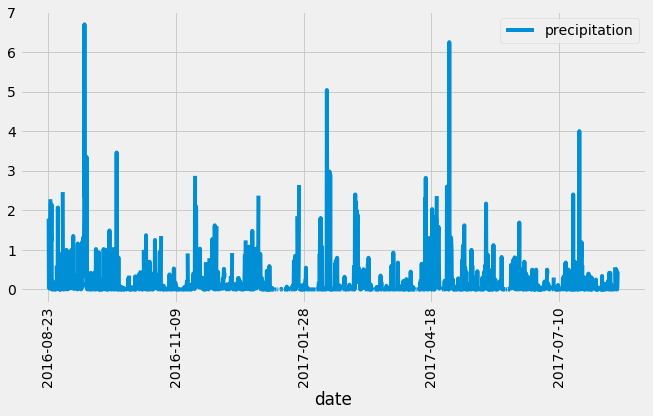

In [16]:
# Use Pandas Plotting with Matplotlib to plot the data
df.plot(figsize = (10,5), rot = 90)

#### ---

In [17]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [18]:
# How many stations are available in this dataset?

session.query(func.count(Station.station)).all()

[(9)]

In [19]:
# What are the most active stations?
# List the stations and the counts in descending order.

# session.query(Measurement.station, func.count(Measurement.station)).all()

session.query(Measurement.station, func.count(Measurement.station)).\
group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [20]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?

session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
filter(Measurement.station == 'USC00519281').all()

[(54.0, 85.0, 71.66378066378067)]

     tobs
0    77.0
1    77.0
2    80.0
3    80.0
4    75.0
..    ...
347  77.0
348  77.0
349  76.0
350  76.0
351  79.0

[352 rows x 1 columns]


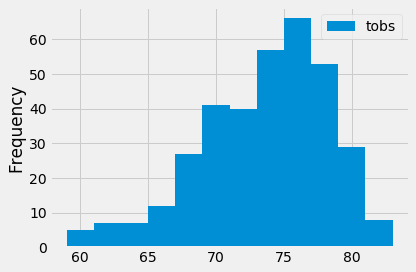

In [21]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
    # Filter out all stations except the one with most readings, then filter out time frame 
    # to "prev_year" or later. Save results to list with .all()
    
results = session.query(Measurement.tobs).\
filter(Measurement.station == 'USC00519281').\
filter(Measurement.date >= prev_year).all()

# print (results)

    # Convert to a df for readability
df = pd.DataFrame(results, columns=['tobs'])
print (df)

df.plot.hist(bins=12)
plt.tight_layout()

# SKILL DRILL- change bins to 5 (highest temp peak around 74-~77/78) and then to 20 (Highest frequency peak around 77/78 degrees)


In [22]:
# Write a function called `calc_temps` that will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates


# Challenge

#### Instructions
##### Complete the following steps:
1. Identify key statistical data in June across all of the stations and years using the describe() function.
2. Identify key statistical data in December across all stations and years using the describe() function.
3. Share your findings in the Jupyter Notebook with a few sentences describing the key differences in weather between June and December and 2-3 recommendations for further analysis.

In [23]:
# Get the weather data
weather_results = session.query(Measurement.date, Measurement.station, Measurement.prcp, Measurement.tobs).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
    # In order to save our results as a DataFrame, we need to provide our results 
    # variable as one parameter and specify the column names as our second parameter.
weather_df = pd.DataFrame(weather_results, columns=['Date','Station','Precipitation','Temperature'])

weather_df['Date'] = pd.to_datetime(weather_df['Date'])

# Note dates seem to run from Jan 1st 2010 to Aug 23rd 2017
weather_df
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19550 entries, 0 to 19549
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           19550 non-null  datetime64[ns]
 1   Station        19550 non-null  object        
 2   Precipitation  18103 non-null  float64       
 3   Temperature    19550 non-null  float64       
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 611.1+ KB


In [24]:
# Filter dataframe by June

june_weather_df = weather_df[weather_df['Date'].dt.month == 6]
june_weather_df

,Date,Station,Precipitation,Temperature
133,2010-06-01,USC00519397,0.00,78.0
134,2010-06-02,USC00519397,0.01,76.0
135,2010-06-03,USC00519397,0.00,78.0
136,2010-06-04,USC00519397,0.00,76.0
137,2010-06-05,USC00519397,0.00,77.0
...,...,...,...,...
19492,2017-06-26,USC00516128,0.02,79.0
19493,2017-06-27,USC00516128,0.10,74.0
19494,2017-06-28,USC00516128,0.02,74.0
19495,2017-06-29,USC00516128,0.04,76.0


In [25]:
# 1 Key statistical info for June using the describe function
june_weather_df.describe()

,Precipitation,Temperature
count,1574.000000,1700.000000
mean,0.136360,74.944118
std,0.335731,3.257417
min,0.000000,64.000000
25%,0.000000,73.000000
50%,0.020000,75.000000
75%,0.120000,77.000000
max,4.430000,85.000000


In [26]:
# Filter dataframe by December

december_weather_df = weather_df[weather_df['Date'].dt.month == 12]
december_weather_df

,Date,Station,Precipitation,Temperature
305,2010-12-01,USC00519397,0.04,76.0
306,2010-12-03,USC00519397,0.00,74.0
307,2010-12-04,USC00519397,0.00,74.0
308,2010-12-06,USC00519397,0.00,64.0
309,2010-12-07,USC00519397,0.00,64.0
...,...,...,...,...
19323,2016-12-27,USC00516128,0.14,71.0
19324,2016-12-28,USC00516128,0.14,71.0
19325,2016-12-29,USC00516128,1.03,69.0
19326,2016-12-30,USC00516128,2.37,65.0


In [27]:
# 2 Key statistical info for December using the describe function
december_weather_df.describe()

,Precipitation,Temperature
count,1405.000000,1517.000000
mean,0.216819,71.041529
std,0.541399,3.745920
min,0.000000,56.000000
25%,0.000000,69.000000
50%,0.030000,71.000000
75%,0.150000,74.000000
max,6.420000,83.000000


In [28]:
# plot all weather data from station with most data, USC00519281
# weather_station_df = weather_df[weather_df['Station'] == 'USC00519281']
# weather_station_df 

# weather_station_df.plot(x="Date", y=["Precipitation","Temperature"], figsize = (10,5), rot = 0)


prcp_avgs = weather_df.groupby(weather_df['Date'].dt.month).mean()['Precipitation']
prcp_avgs

Date
1     0.129975
2     0.137271
3     0.204227
4     0.150639
5     0.145677
6     0.136360
7     0.167922
8     0.146662
9     0.164249
10    0.155606
11    0.180380
12    0.216819
Name: Precipitation, dtype: float64

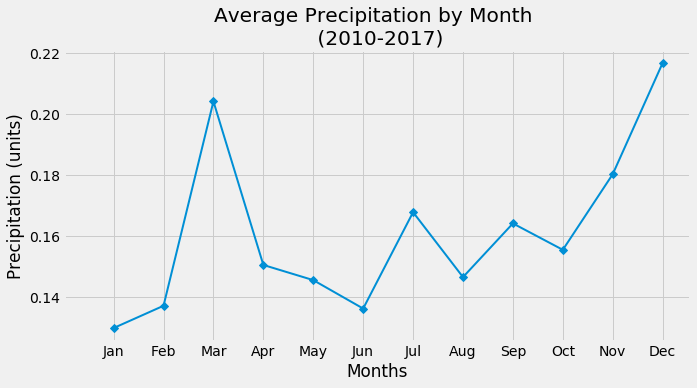

In [29]:
plt.style.use('fivethirtyeight')

months = ['','Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

prcp_avgs.plot(figsize = (10,5), linewidth = 2, use_index = True, marker = "D")

plt.title("Average Precipitation by Month \n (2010-2017)")
plt.xlabel ("Months")
plt.ylabel ("Precipitation (units)")
plt.xticks(np.arange(13), months)

plt.savefig("Figures/Average Precipitation.png", bbox_inches = 'tight')

In [30]:
tobs_avgs = weather_df.groupby(weather_df['Date'].dt.month).mean()['Temperature']
tobs_avgs

Date
1     68.726115
2     69.442236
3     70.059067
4     72.357268
5     73.680900
6     74.944118
7     76.082408
8     76.412454
9     76.164865
10    75.391388
11    73.252688
12    71.041529
Name: Temperature, dtype: float64

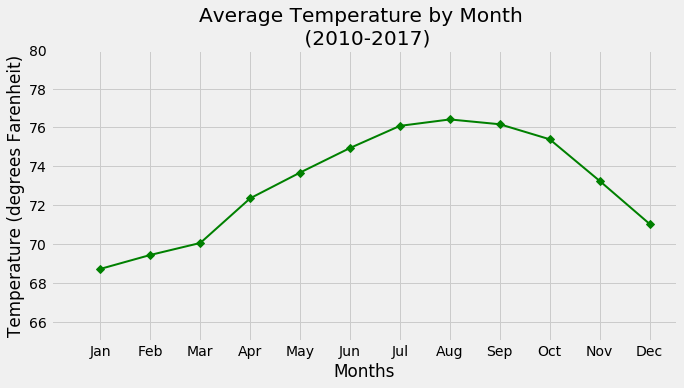

In [31]:
plt.style.use('fivethirtyeight')

months = ['','Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

tobs_avgs.plot(figsize = (10,5), linewidth = 2, use_index = True, ylim = (65, 80), color = "green", marker = "D")

plt.title("Average Temperature by Month \n (2010-2017)")
plt.xlabel ("Months")
plt.ylabel ("Temperature (degrees Farenheit)")
plt.xticks(np.arange(13), months)

plt.savefig("Figures/Average Temperatures.png", bbox_inches = 'tight')

In [32]:
# Findings in Jupyter Notebook and Recommendations etc. in accompanying Readme in github repo.